In [1]:
from main import *
from utils import load_session
from preprocess import resize_and_pad

In [2]:
class CFG:
    image_size = IMAGE_SIZE
    conf_thres = 0.01
    iou_thres = 0.1

cfg = CFG()

In [3]:
session = load_session(PATH_MODEL)

c:\Users\HI\AppData\Local\Programs\Python\Python310\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [4]:
session.get_providers()

['CPUExecutionProvider']

In [5]:
from PIL import Image, ImageDraw

In [6]:
image_cv = cv2.imread("sample/1.jpg")

In [7]:
image, ratio, (padd_left, padd_top) = resize_and_pad(image_cv, new_shape=cfg.image_size)
img_norm = normalization_input(image)

In [8]:
pred = infer(session, img_norm)
pred = postprocess(pred)[0]

(300, 4)


In [9]:
paddings = np.array([padd_left, padd_top, padd_left, padd_top])
pred[:,:4] = (pred[:,:4] - paddings) / ratio

In [10]:
pred.shape

(20, 6)

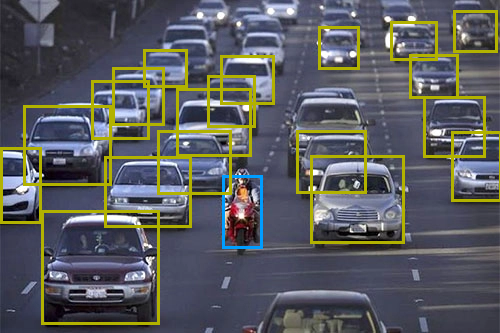

In [11]:
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image_cv)
visualize(image, pred)